In [134]:
#Importing packages 
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
# Read in dataframes
mich = pd.read_csv('data/usa-2016-presidential-election-by-county-Michigan.csv', delimiter = ';')
fl = pd.read_csv('data/usa-2016-presidential-election-by-county-Florida.csv', delimiter = ';')
pa = pd.read_csv('data/usa-2016-presidential-election-by-county-Pennsylvania.csv', delimiter = ';')
az = pd.read_csv('data/usa-2016-presidential-election-by-county-Arizona.csv', delimiter = ';')
ga = pd.read_csv('data/usa-2016-presidential-election-by-county-Georgia.csv', delimiter = ';')
ia = pd.read_csv('data/usa-2016-presidential-election-by-county-Iowa.csv', delimiter = ';')
nv = pd.read_csv('data/usa-2016-presidential-election-by-county-Nevada.csv', delimiter = ';')
nc = pd.read_csv('data/usa-2016-presidential-election-by-county-North Carolina.csv', delimiter = ';')
oh = pd.read_csv('data/usa-2016-presidential-election-by-county-Ohio.csv', delimiter = ';')
tx = pd.read_csv('data/usa-2016-presidential-election-by-county-Texas.csv', delimiter = ';')
wi = pd.read_csv('data/usa-2016-presidential-election-by-county-Wisconsin.csv', delimiter = ';')
mn = pd.read_csv('data/usa-2016-presidential-election-by-county-Minnesota.csv', delimiter = ';')

unemployment = pd.read_csv('data/laucnty16.csv', header = 3)
earnings_poverty = pd.read_csv('data/est16all.csv', header = 3)
#gdp = pd.read_csv('data/real_GDP_2016.csv', error_bad_lines=False)

In [3]:
# Concat all states into one dataframe
df = pd.concat([mich,fl,pa,az,ga,ia,nv,nc,oh,tx,wi,mn], ignore_index = True)
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,...,Votes16 Trumpd,Votes16 Clintonh,Votes16 Johnsong,Votes16 Steinj,Votes16 Castled,Votes16 De La Fuenter,Est Votes Remaining,Votes16 Mcmulline,Votes16 Hedgesj,Votes16 Kahnl,Votes16 La Rivag,Votes16 Hoeflingt,Votes16 Kenistonc,Votes16 Smithm,Votes16 Atwoodf,Votes16 Kennedya,Votes16 Kopitkek,Votes16 Kotlikoffl,Votes16 Lyttleb,Votes16 Maldonadoj,Votes16 Maturenm,Votes16 Scottr,Votes16 Silvar,Votes16 Soltysike,Votes16 Vacekd,Votes16 Copelands,Votes16 Jacobp,Votes16 Whitej,Votes16 Mooreheadm,Votes16 None Of These Candidates,Votes16 Duncanr,Votes16 Skewesp,Votes16 Giordanir,total16,Other16 Frac,Rep16 Frac2,Dem16 Frac2,Name Prev,Statecode Prev,total08,total12,other08,other12,Other12 Frac,Other08 Frac,Rep12 Frac2,Rep08 Frac2,Dem12 Frac2,Dem08 Frac2,"Dem08 Frac2,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,Michigan,MI,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.4

In [4]:
lst = list(df.columns)
lst

['State',
 'ST',
 'Fips',
 'County',
 'Precincts',
 'Votes',
 'Democrats 08 (Votes)',
 'Democrats 12 (Votes)',
 'Republicans 08 (Votes)',
 'Republicans 12 (Votes)',
 'Republicans 2016',
 'Democrats 2016',
 'Green 2016',
 'Libertarians 2016',
 'Republicans 2012',
 'Republicans 2008',
 'Democrats 2012',
 'Democrats 2008',
 'Less Than High School Diploma',
 'At Least High School Diploma',
 "At Least Bachelors's Degree",
 'Graduate Degree',
 'School Enrollment',
 'Median Earnings 2010',
 'White (Not Latino) Population',
 'African American Population',
 'Native American Population',
 'Asian American Population',
 'Other Race or Races',
 'Latino Population',
 'Children Under 6 Living in Poverty',
 'Adults 65 and Older Living in Poverty',
 'Total Population',
 'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
 'Poverty.Rate.below.federal.poverty.threshold',
 'Gini.Coefficient',
 'Child.Poverty.living.in.families.below.the.poverty.line',
 'Management.professional.and.related.occupations',
 '

In [5]:
lst[99:]

['Nearest County',
 'temp',
 'precip',
 'Temp Bins',
 'Lat Bins',
 'Lon Bins',
 'Precip Bins',
 'Elevation Bins',
 'Geo Shape',
 'Name 16',
 'reporting',
 'Votes16 Trumpd',
 'Votes16 Clintonh',
 'Votes16 Johnsong',
 'Votes16 Steinj',
 'Votes16 Castled',
 'Votes16 De La Fuenter',
 'Est Votes Remaining',
 'Votes16 Mcmulline',
 'Votes16 Hedgesj',
 'Votes16 Kahnl',
 'Votes16 La Rivag',
 'Votes16 Hoeflingt',
 'Votes16 Kenistonc',
 'Votes16 Smithm',
 'Votes16 Atwoodf',
 'Votes16 Kennedya',
 'Votes16 Kopitkek',
 'Votes16 Kotlikoffl',
 'Votes16 Lyttleb',
 'Votes16 Maldonadoj',
 'Votes16 Maturenm',
 'Votes16 Scottr',
 'Votes16 Silvar',
 'Votes16 Soltysike',
 'Votes16 Vacekd',
 'Votes16 Copelands',
 'Votes16 Jacobp',
 'Votes16 Whitej',
 'Votes16 Mooreheadm',
 'Votes16 None Of These Candidates',
 'Votes16 Duncanr',
 'Votes16 Skewesp',
 'Votes16 Giordanir',
 'total16',
 'Other16 Frac',
 'Rep16 Frac2',
 'Dem16 Frac2',
 'Name Prev',
 'Statecode Prev',
 'total08',
 'total12',
 'other08',
 'other12',


In [6]:
cols = list(range(99,160))

In [7]:
# Dropping columns not listed on website
df = df.drop(df.columns[cols], axis = 1)

In [8]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Sire Homogeneity,Median Age,lon,lat,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,CA,S,MAR,CFS,ACFS,Mean Alc,Max Alc,Mixedness,elevation,Annual Prcp,Winter Prcp,Summer Prcp,Spring Prcp,Autumn Prcp,Annual Tavg,Annual Tmax,Annual Tmin,Winter Tavg,Winter Tmax,Winter Tmin,Summer Tavg,Summer Tmax,Summer Tmin,Spring Tavg,Spring Tmax,Spring Tmin,Autumn Tavg,Autumn Tmax,Autumn Tmin
0,Michigan,MI,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,0.942088,50.5,-83.384019,45.489515,7.1,2.6,0.07,23.1,0.308,0.159,0.333,0.135,68.4,NaN,0.162,0.140,145.84,NaN,87.6,NaN,-0.521800,-0.190423,0.865160,0.000114,0.000114,0.000136,0.001190,0.407904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michigan,MI,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,1.073385,3.881877,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,0.664075,38.4,-85.012385,42.242990,4.0,4.9,0.08,49.2,0.417,0.258,0.371,0.122,662.8,101.4,0.143,0.074,668.93,5.81,73.4,9.1,-0.729159,-0.730048,0.624582,0.000027,0.000027,0.000037,0.000166,-0.560323,284.700000,3513.500000,563.000000,1086.000000,890.500000,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Michigan,MI,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,0.848999,3.183748,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,0.819238,39.1,-85.066523,41.918585,4.9,4.2,0.07,46.6,0.283,0.148,0.351,0.114,170.4,58.2,0.147,0.085,191.93,NaN,57.3,6.4,-0.650689,-0.225844,0.628525,0.000037,0.000037,0.000037,0.000183,-0.501995,299.900000,3805.000000,662.000000,1188.000000,988.000000,967.0,482.000000,568.000000,396.000000,257.000000,322.0,193.000000,693.000000,791.00,594.000000,471.000000,565.000000,376.000000,503.00,591.00,416.000000
3,Michigan,MI,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,1.063330,4.876043,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403

In [9]:
to_drop_cols = list(df.columns)

In [10]:
to_drop_cols[79:99]

['Annual Prcp',
 'Winter Prcp',
 'Summer Prcp',
 'Spring Prcp',
 'Autumn Prcp',
 'Annual Tavg',
 'Annual Tmax',
 'Annual Tmin',
 'Winter Tavg',
 'Winter Tmax',
 'Winter Tmin',
 'Summer Tavg',
 'Summer Tmax',
 'Summer Tmin',
 'Spring Tavg',
 'Spring Tmax',
 'Spring Tmin',
 'Autumn Tavg',
 'Autumn Tmax',
 'Autumn Tmin']

In [11]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Sire Homogeneity,Median Age,lon,lat,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,CA,S,MAR,CFS,ACFS,Mean Alc,Max Alc,Mixedness,elevation,Annual Prcp,Winter Prcp,Summer Prcp,Spring Prcp,Autumn Prcp,Annual Tavg,Annual Tmax,Annual Tmin,Winter Tavg,Winter Tmax,Winter Tmin,Summer Tavg,Summer Tmax,Summer Tmin,Spring Tavg,Spring Tmax,Spring Tmin,Autumn Tavg,Autumn Tmax,Autumn Tmin
0,Michigan,MI,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,0.942088,50.5,-83.384019,45.489515,7.1,2.6,0.07,23.1,0.308,0.159,0.333,0.135,68.4,NaN,0.162,0.140,145.84,NaN,87.6,NaN,-0.521800,-0.190423,0.865160,0.000114,0.000114,0.000136,0.001190,0.407904,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Michigan,MI,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,1.073385,3.881877,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,0.664075,38.4,-85.012385,42.242990,4.0,4.9,0.08,49.2,0.417,0.258,0.371,0.122,662.8,101.4,0.143,0.074,668.93,5.81,73.4,9.1,-0.729159,-0.730048,0.624582,0.000027,0.000027,0.000037,0.000166,-0.560323,284.700000,3513.500000,563.000000,1086.000000,890.500000,974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Michigan,MI,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,0.848999,3.183748,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,0.819238,39.1,-85.066523,41.918585,4.9,4.2,0.07,46.6,0.283,0.148,0.351,0.114,170.4,58.2,0.147,0.085,191.93,NaN,57.3,6.4,-0.650689,-0.225844,0.628525,0.000037,0.000037,0.000037,0.000183,-0.501995,299.900000,3805.000000,662.000000,1188.000000,988.000000,967.0,482.000000,568.000000,396.000000,257.000000,322.0,193.000000,693.000000,791.00,594.000000,471.000000,565.000000,376.000000,503.00,591.00,416.000000
3,Michigan,MI,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,1.063330,4.876043,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403

In [12]:
# Dropping climate related columns
to_drop  = list(range(79,99))
df = df.drop(df.columns[to_drop], axis = 1)

In [13]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Sire Homogeneity,Median Age,lon,lat,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,CA,S,MAR,CFS,ACFS,Mean Alc,Max Alc,Mixedness,elevation
0,Michigan,MI,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,0.942088,50.5,-83.384019,45.489515,7.1,2.6,0.07,23.1,0.308,0.159,0.333,0.135,68.4,NaN,0.162,0.140,145.84,NaN,87.6,NaN,-0.521800,-0.190423,0.865160,0.000114,0.000114,0.000136,0.001190,0.407904,NaN
1,Michigan,MI,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,1.073385,3.881877,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,0.664075,38.4,-85.012385,42.242990,4.0,4.9,0.08,49.2,0.417,0.258,0.371,0.122,662.8,101.4,0.143,0.074,668.93,5.81,73.4,9.1,-0.729159,-0.730048,0.624582,0.000027,0.000027,0.000037,0.000166,-0.560323,284.700000
2,Michigan,MI,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,0.848999,3.183748,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,0.819238,39.1,-85.066523,41.918585,4.9,4.2,0.07,46.6,0.283,0.148,0.351,0.114,170.4,58.2,0.147,0.085,191.93,NaN,57.3,6.4,-0.650689,-0.225844,0.628525,0.000037,0.000037,0.000037,0.000183,-0.501995,299.900000
3,Michigan,MI,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,1.063330,4.876043,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,0.911732,39.4,-84.146352,42.951545,3.8,4.4,0.07,27.7,0.344,0.213,0.346,0.103,233.4,35.1,0.132,0.093,243.46,NaN,70.1,8.4,0.357658,-0.045617,0.500663,0.000028,0.000028,0.000045,0.000226,-0.693608,229.833333
4,Michigan,MI,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,1.116951,2.956636,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,0.615183,47.1,-

In [14]:
#Dropping ones we didn't know what they meant
cols = ['CA', 'S', 'MAR', 'CFS', 'ACFS', 'Mixedness', 'elevation', 'Sire Homogeneity']
df = df.drop(df[cols], axis =1)

In [15]:
df.head()

,State,ST,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Green 2016,Libertarians 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality,Mean Alc,Max Alc
0,Michigan,MI,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,0.693001,3.284823,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,7.1,2.6,0.07,23.1,0.308,0.159,0.333,0.135,68.4,NaN,0.162,0.140,145.84,NaN,87.6,NaN,0.000136,0.001190
1,Michigan,MI,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,1.073385,3.881877,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,4.0,4.9,0.08,49.2,0.417,0.258,0.371,0.122,662.8,101.4,0.143,0.074,668.93,5.81,73.4,9.1,0.000037,0.000166
2,Michigan,MI,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,0.848999,3.183748,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,4.9,4.2,0.07,46.6,0.283,0.148,0.351,0.114,170.4,58.2,0.147,0.085,191.93,NaN,57.3,6.4,0.000037,0.000183
3,Michigan,MI,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,1.063330,4.876043,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,3.8,4.4,0.07,27.7,0.344,0.213,0.346,0.103,233.4,35.1,0.132,0.093,243.46,NaN,70.1,8.4,0.000045,0.000226
4,Michigan,MI,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,1.116951,2.956636,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,3.1,NaN,0.07,19.3,0.281,0.242,0.338,0.125,154.0,NaN,0.209,0.107,229.60,NaN,90.4,NaN,0.000081,0.000482


In [16]:
# Dropping columns not relevant to our objective
cols = ['Green 2016', 'Libertarians 2016','ST', 'Mean Alc', 'Max Alc']
df = df.drop(df[cols], axis = 1)

In [17]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Poor.physical.health.days,Poor.mental.health.days,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.smoking,Adult.obesity,Diabetes,Sexually.transmitted.infections,HIV.prevalence.rate,Uninsured,Unemployment,Violent.crime,Homicide.rate,Injury.deaths,Infant.mortality
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,7.1,2.6,0.07,23.1,0.308,0.159,0.333,0.135,68.4,NaN,0.162,0.140,145.84,NaN,87.6,NaN
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,4.0,4.9,0.08,49.2,0.417,0.258,0.371,0.122,662.8,101.4,0.143,0.074,668.93,5.81,73.4,9.1
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,4.9,4.2,0.07,46.6,0.283,0.148,0.351,0.114,170.4,58.2,0.147,0.085,191.93,NaN,57.3,6.4
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,3.8,4.4,0.07,27.7,0.344,0.213,0.346,0.103,233.4,35.1,0.132,0.093,243.46,NaN,70.1,8.4
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,3.1,NaN,0.07,19.3,0.281,0.242,0.338,0.125,154.0,NaN,0.209,0.107,229.60,NaN,90.4,NaN


In [18]:
#Let's investigate how many missing values we have 
df_null_ratios = df.isnull().sum()/len(df)*100
df_null_ratios[30:]

Preschool.Enrollment.Ratio.enrolled.ages.3.and.4               0.361011
Poverty.Rate.below.federal.poverty.threshold                   0.000000
Gini.Coefficient                                               0.000000
Child.Poverty.living.in.families.below.the.poverty.line        0.000000
Management.professional.and.related.occupations                0.000000
Service.occupations                                            0.000000
Sales.and.office.occupations                                   0.000000
Farming.fishing.and.forestry.occupations                       0.000000
Construction.extraction.maintenance.and.repair.occupations     0.000000
Production.transportation.and.material.moving.occupations      0.000000
White                                                          0.000000
Black                                                          0.000000
Hispanic                                                       0.000000
Asian                                                          0

In [19]:
# Dropping columns with a high percentage of missing values
columns = df.columns
for col in columns:
    if (df[col].isnull().sum()/len(df)*100) > 5:
        df = df.drop(col, axis = 1)
        
        

In [20]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,0.140,145.84
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,0.074,668.93
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,0.085,191.93
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,0.093,243.46
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,0.107,229.60


In [21]:
# Let's merge in our unemployment table
unemployment.head()

,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
0,CN0100100000000,1.0,1.0,"Autauga County, AL",2016.0,NaN,"26,031","24,709","1,322",5.1
1,CN0100300000000,1.0,3.0,"Baldwin County, AL",2016.0,NaN,"90,895","86,060","4,835",5.3
2,CN0100500000000,1.0,5.0,"Barbour County, AL",2016.0,NaN,"8,436","7,736",700,8.3
3,CN0100700000000,1.0,7.0,"Bibb County, AL",2016.0,NaN,"8,644","8,088",556,6.4
4,CN0100900000000,1.0,9.0,"Blount County, AL",2016.0,NaN,"24,684","23,358","1,326",5.4


In [22]:
# Adding a new column to our df formatted the same as the County Name/State Abbreviation column in our 
# unemployment table
df['county_state'] = 0


for i in range(0,len(df)):
    if 'Michigan' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', MI'
    if 'Florida' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', FL'
    if 'Nevada' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', NV'
    if 'Texas' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', TX'
    if 'Minnesota' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', MN'
    if 'Arizona' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', AZ'
    if 'Wisconsin' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', WI'
    if 'Iowa' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', IA'
    if 'Ohio' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', OH'
    if 'North Carolina' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', NC'
    if 'Georgia' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', GA'
    if 'Pennsylvania' in (df['County'][i]):
        x = df['County'][i]
        df['county_state'][i] = x[:x.index(',')] +', PA'
               

<ipython-input-22-d97ded756df9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county_state'][i] = x[:x.index(',')] +', MI'
C:\Users\salon\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-22-d97ded756df9>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['county_state'][i] = x[:x.index(',')] +', FL'
<ipython-input-22

In [23]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,county_state
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,0.140,145.84,"Presque Isle County, MI"
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,0.074,668.93,"Calhoun County, MI"
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,0.085,191.93,"Branch County, MI"
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,0.093,243.46,"Shiawassee County, MI"
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,0.107,229.60,"Mackinac County, MI"


In [24]:
# Merging unemployment with df
df = pd.merge(df, unemployment, how = 'inner', left_on = 'county_state', right_on = 'County Name/State Abbreviation')

In [25]:
df

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Unemployment,Violent.crime,county_state,Code,Code.1,Code.2,County Name/State Abbreviation,Year,Unnamed: 5,Force,Employed,Unemployed,(%)
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.20,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.20,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,0.140,145.84,"Presque Isle County, MI",CN2614100000000,26.0,141.0,"Presque Isle County, MI",2016.0,NaN,"5,286","4,780",506,9.6
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.60,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.60,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,0.074,668.93,"Calhoun County, MI",CN2602500000000,26.0,25.0,"Calhoun County, MI",2016.0,NaN,"64,390","61,295","3,095",4.8
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.60,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.60,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,0.085,191.93,"Branch County, MI",CN2602300000000,26.0,23.0,"Branch County, MI",2016.0,NaN,"19,097","18,177",920,4.8
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.30,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.30,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,0.093,243.46,"Shiawassee County, MI",CN2615500000000,26.0,155.0,"Shiawassee County, MI",2016.0,NaN,"33,477","31,714","1,763",5.3
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.60,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.60,15.05,4.75,77.40,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,0.107,229.60,"Mackinac County, MI",CN2609700000000,26.0,97.0,"Mackinac County, MI",2016.0,NaN,"5,188","4,675",513,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [26]:
# Dropping unneeded columns from the newly merged unemployment table
cols = ['Unemployment', 'Code', 'Code.1', 'Code.2', 'Unnamed: 5']
df = df.drop(df[cols], axis = 1)

In [27]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,county_state,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%)
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,"Presque Isle County, MI","Presque Isle County, MI",2016.0,"5,286","4,780",506,9.6
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,"Calhoun County, MI","Calhoun County, MI",2016.0,"64,390","61,295","3,095",4.8
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,"Branch County, MI","Branch County, MI",2016.0,"19,097","18,177",920,4.8
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,"Shiawassee County, MI","Shiawassee County, MI",2016.0,"33,477","31,714","1,763",5.3
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,229.60,"Mackinac County, MI","Mackinac County, MI",2016.0,"5,188","4,675",513,9.9


In [28]:
earnings_poverty.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages",90% CI Lower Bound,90% CI Upper Bound,"Poverty Percent, All Ages",90% CI Lower Bound.1,90% CI Upper Bound.1,"Poverty Estimate, Age 0-17",90% CI Lower Bound.2,90% CI Upper Bound.2,"Poverty Percent, Age 0-17",90% CI Lower Bound.3,90% CI Upper Bound.3,"Poverty Estimate, Age 5-17 in Families",90% CI Lower Bound.4,90% CI Upper Bound.4,"Poverty Percent, Age 5-17 in Families",90% CI Lower Bound.5,90% CI Upper Bound.5,Median Household Income,90% CI Lower Bound.6,90% CI Upper Bound.6,"Poverty Estimate, Age 0-4",90% CI Lower Bound.7,90% CI Upper Bound.7,"Poverty Percent, Age 0-4",90% CI Lower Bound.8,90% CI Upper Bound.8
0,0,0,US,United States,44268996,44022086,44515906,14,13.9,14.1,14115713,13976345,14255081,19.5,19.3,19.7,9648486,9548767,9748205,18.3,18.1,18.5,57617,57502,57732,4156949,4108397,4205501,21.3,21.1,21.5
1,1,0,AL,Alabama,814197,796927,831467,17.2,16.8,17.6,267674,258276,277072,24.7,23.8,25.6,185889,177569,194209,23.5,22.4,24.6,46309,45650,46968,78675,74257,83093,27.4,25.9,28.9
2,1,1,AL,Autauga County,7444,6255,8633,13.5,11.3,15.7,2588,2090,3086,19.3,15.6,23,1887,1522,2252,18.4,14.8,22,54487,50886,58088,.,.,.,.,.,.
3,1,3,AL,Baldwin County,24005,20132,27878,11.7,9.8,13.6,7881,6231,9531,17.6,13.9,21.3,5512,4262,6762,16.6,12.8,20.4,56460,53250,59670,.,.,.,.,.,.
4,1,5,AL,Barbour County,6787,5551,8023,29.9,24.5,35.3,2146,1675,2617,39.6,30.9,48.3,1502,1160,1844,36.8,28.4,45.2,32884,29684,36084,.,.,.,.,.,.


In [29]:
earnings_poverty.dtypes

State FIPS Code                            int64
County FIPS Code                           int64
Postal Code                               object
Name                                      object
Poverty Estimate, All Ages                object
90% CI Lower Bound                        object
90% CI Upper Bound                        object
Poverty Percent, All Ages                 object
90% CI Lower Bound.1                      object
90% CI Upper Bound.1                      object
Poverty Estimate, Age 0-17                object
90% CI Lower Bound.2                      object
90% CI Upper Bound.2                      object
Poverty Percent, Age 0-17                 object
90% CI Lower Bound.3                      object
90% CI Upper Bound.3                      object
Poverty Estimate, Age 5-17 in Families    object
90% CI Lower Bound.4                      object
90% CI Upper Bound.4                      object
Poverty Percent, Age 5-17 in Families     object
90% CI Lower Bound.5

In [30]:
# Keep median household income, poverty percent all ages, poverty estimate all ages, name
# Dropping columns from earnings_poverty data frame that we don't need
to_drop = earnings_poverty.iloc[:,[5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,23,24,25,26,27,28,29,30]]
earnings_poverty = earnings_poverty.drop(earnings_poverty[to_drop.columns], axis = 1)

In [31]:
earnings_poverty.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income
0,0,0,US,United States,44268996,14,57617
1,1,0,AL,Alabama,814197,17.2,46309
2,1,1,AL,Autauga County,7444,13.5,54487
3,1,3,AL,Baldwin County,24005,11.7,56460
4,1,5,AL,Barbour County,6787,29.9,32884


In [32]:
#Making new column in earnings_poverty that matches the Fips column in df
earnings_poverty['state_county_fips'] = 0
for i in range(0,len(earnings_poverty)):
    if (earnings_poverty['County FIPS Code'][i]) < 10:
        earnings_poverty['state_county_fips'][i] = str(earnings_poverty['State FIPS Code'][i]) + '00' + str(earnings_poverty['County FIPS Code'][i])
    elif (earnings_poverty['County FIPS Code'][i]) < 100:
        earnings_poverty['state_county_fips'][i] = str(earnings_poverty['State FIPS Code'][i]) + '0' + str(earnings_poverty['County FIPS Code'][i])
    else:
        earnings_poverty['state_county_fips'][i] = str(earnings_poverty['State FIPS Code'][i]) +''+ str(earnings_poverty['County FIPS Code'][i])
        

<ipython-input-32-9c7e3ee9762e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_poverty['state_county_fips'][i] = str(earnings_poverty['State FIPS Code'][i]) + '00' + str(earnings_poverty['County FIPS Code'][i])
<ipython-input-32-9c7e3ee9762e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  earnings_poverty['state_county_fips'][i] = str(earnings_poverty['State FIPS Code'][i]) + '0' + str(earnings_poverty['County FIPS Code'][i])
<ipython-input-32-9c7e3ee9762e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pyd

In [33]:
earnings_poverty.head()

,State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,state_county_fips
0,0,0,US,United States,44268996,14,57617,0
1,1,0,AL,Alabama,814197,17.2,46309,1000
2,1,1,AL,Autauga County,7444,13.5,54487,1001
3,1,3,AL,Baldwin County,24005,11.7,56460,1003
4,1,5,AL,Barbour County,6787,29.9,32884,1005


In [34]:
# Merging df and earnings_poverty
df = pd.merge(df, earnings_poverty, how = 'inner', left_on = 'Fips', right_on = 'state_county_fips')

In [35]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,county_state,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%),State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,state_county_fips
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,"Presque Isle County, MI","Presque Isle County, MI",2016.0,"5,286","4,780",506,9.6,26,141,MI,Presque Isle County,1852,14.7,43484,26141
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,"Calhoun County, MI","Calhoun County, MI",2016.0,"64,390","61,295","3,095",4.8,26,25,MI,Calhoun County,21973,16.8,46423,26025
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,"Branch County, MI","Branch County, MI",2016.0,"19,097","18,177",920,4.8,26,23,MI,Branch County,6969,16.8,48321,26023
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,"Shiawassee County, MI","Shiawassee County, MI",2016.0,"33,477","31,714","1,763",5.3,26,155,MI,Shiawassee County,8106,12,52716,26155
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,229.60,"Mackinac County, MI","Mackinac County, MI",2016.0,"5,188","4,675",513,9.9,26

Next meeting: Tuesday @ 5


Before next meeting: 
emily will finish dropping these columns and merge this last dataframe ✔️
emily fix the gdp df

look for 2012 data

sketch of midterm report

next things to do:

finish feature subset selection

begin to build our model

do all this again for 2012


In next meeting:


midterm report goal: model that preforms relatively well on 2016 data 

In [36]:
gdp = pd.read_csv('data/gdp_2016.csv')

In [37]:
gdp

,GeoFips,GeoName,2016
0,0,United States,17688890000
1,4000,Arizona,289230418
2,12000,Florida,866730997
3,13000,Georgia,498266779
4,19000,Iowa,168876432
...,...,...,...
1073,55133,"Waukesha, WI",26590180
1074,55135,"Waupaca, WI",1924481
1075,55137,"Waushara, WI",541106
1076,55139,"Winnebago, WI",9094803


In [38]:
gdp.tail(20)

,GeoFips,GeoName,2016
1058,55103,"Richland, WI",688913
1059,55105,"Rock, WI",6574748
1060,55107,"Rusk, WI",508721
1061,55109,"St. Croix, WI",2837701
1062,55111,"Sauk, WI",3133973
1063,55113,"Sawyer, WI",582465
1064,55115,"Shawano, WI",1225289
1065,55117,"Sheboygan, WI",6412720
1066,55119,"Taylor, WI",840499
1067,55121,"Trempealeau, WI",1205737


In [39]:
gdp.dtypes

GeoFips     int64
GeoName    object
2016        int64
dtype: object

In [40]:
df.dtypes

State                         object
Fips                           int64
County                        object
Precincts                      int64
Votes                          int64
                               ...  
Name                          object
Poverty Estimate, All Ages    object
Poverty Percent, All Ages     object
Median Household Income       object
state_county_fips              int64
Length: 73, dtype: object

In [41]:
df['Fips'] = df['Fips'].astype(int)

In [42]:
# Merging df and gdp
df = pd.merge(df, gdp, how = 'inner', left_on = 'Fips', right_on = 'GeoFips') #Did an outer join bc with an inner we lost a lot of rows...what happened here?
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,county_state,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%),State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,state_county_fips,GeoFips,GeoName,2016
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.2,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,"Presque Isle County, MI","Presque Isle County, MI",2016.0,"5,286","4,780",506,9.6,26,141,MI,Presque Isle County,1852,14.7,43484,26141,26141,"Presque Isle, MI",393475
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.6,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,"Calhoun County, MI","Calhoun County, MI",2016.0,"64,390","61,295","3,095",4.8,26,25,MI,Calhoun County,21973,16.8,46423,26025,26025,"Calhoun, MI",5594998
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.6,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,"Branch County, MI","Branch County, MI",2016.0,"19,097","18,177",920,4.8,26,23,MI,Branch County,6969,16.8,48321,26023,26023,"Branch, MI",1245185
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.3,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,"Shiawassee County, MI","Shiawassee County, MI",2016.0,"33,477","31,714","1,763",5.3,26,155,MI,Shiawassee County,8106,12,52716,26155,26155,"Shiawassee, MI",1602095
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.6,15.05,4.75,77.40,47.1,-85.30

In [43]:
df[df['State'] == 'Arizona']

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,county_state,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%),State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,state_county_fips,GeoFips,GeoName,2016
216,Arizona,4012,"La Paz County, Arizona",11,4931,1929,1880,3509,3714,68.566214,26.728858,64.760244,63.202450,32.781168,34.744236,23.1,76.9,9.0,3.3,71.35,21059.850475,62.50,0.80,10.25,1.25,1.50,23.70,34.90,6.55,20272,54.1,20.00,0.437,32.75,24.30,27.10,22.00,6.65,12.85,7.10,62.50,0.80,23.70,1.25,10.25,1.50,63.75,52.5,-114.038793,33.727625,0.06,78.7,0.467,0.312,0.134,244.9,0.262,344.55,"La Paz County, AZ","La Paz County, AZ",2016.0,"8,459","7,949",510,6.0,4,12,AZ,La Paz County,4976,24.8,34285,4012,4012,"La Paz, AZ",582158
217,Arizona,4023,"Santa Cruz County, Arizona",24,14926,8683,9486,4518,4235,24.453973,71.579794,30.443534,33.962264,68.190641,65.270992,29.1,70.9,17.3,5.8,80.15,21142.647935,17.35,0.15,0.35,0.40,0.45,81.35,33.05,16.15,44985,17.4,23.65,0.474,33.55,24.35,18.80,34.95,1.10,7.65,13.25,17.35,0.15,81.35,0.40,0.35,0.45,17.75,35.2,-110.845190,31.525904,0.08,56.5,0.338,0.201,0.064,400.6,0.262,157.53,"Santa Cruz County, AZ","Santa Cruz County, AZ",2016.0,"19,161","17,244","1,917",10.0,4,23,AZ,Santa Cruz County,9569,20.9,39090,4023,4023,"Santa Cruz, AZ",1544234
218,Arizona,4005,"Coconino County, Arizona",71,44929,31433,29257,22186,21220,36.887089,56.328874,40.837535,40.825114,56.304607,57.840792,13.0,87.0,31.1,12.8,76.65,23125.068570,54.80,1.10,27.45,1.25,2.35,13.00,21.60,13.60,130866,46.4,18.00,0.443,21.50,32.70,21.30,24.50,0.30,10.05,11.10,54.80,1.10,13.00,1.25,27.45,2.35,56.05,30.8,-111.773728,35.829692,0.08,36.0,0.382,0.233,0.073,591.0,0.226,378.06,"Coconino County, AZ","Coconino County, AZ",2016.0,"74,081","69,639","4,442",6.0,4,5,AZ,Coconino County,23116,17.8,53643,4005,4005,"Coconino, AZ",6396139
219,Arizona,4027,"Yuma County, Arizona",44,40759,18559,18059,24577,23352,50.506637,44.986383,55.503530,56.349880,42.923015,42.551874,28.4,71.6,13.3,4.6,69.65,21877.505080,37.25,1.70,1.00,1.00,1.35,57.70,31.00,12.60,192367,34.9,20.40,0.423,29.50,24.20,21.40,23.85,6.00,12.90,11.60,37.25,1.70,57.70,1.00,1.00,1.35,38.25,33.9,-113.910905,32.773942,0.06,68.5,0.371,0.311,0.097,463.0,0.241,372.21,"Yuma County, AZ","Yuma County, AZ",2016.0,"93,912","76,271","17,641",18.8,4,27,AZ,Yuma County,37850,19.3,42998,4027,4027,"Yuma, AZ",7370372
220,Arizona,4009,"Graham County, Arizona",22,11939,3487,3609,8376,8076,67.216685,27.648882,67.837043,69.759307,30.314994,29.041393,18.2,81.8,13.4,5.2,71.65,22234.051745,53.15,2.00,14.10,0.50,1.10,29.05,27.90,9.65,36000,25.8,19.45,0.409,25.85,25.55,20.25,23.80,1.60,17.10,11.70,53.15,2.00,29.05,0.50,14.10,1.10,53.65,31.5,-109.878310,32.931828,

In [44]:
df

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,White,Black,Hispanic,Asian,Amerindian,Other,White Asian,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,county_state,County Name/State Abbreviation,Year,Force,Employed,Unemployed,(%),State FIPS Code,County FIPS Code,Postal Code,Name,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,state_county_fips,GeoFips,GeoName,2016
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.20,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,97.05,0.30,0.75,0.20,0.70,1.00,97.25,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,"Presque Isle County, MI","Presque Isle County, MI",2016.0,"5,286","4,780",506,9.6,26,141,MI,Presque Isle County,1852,14.7,43484,26141,26141,"Presque Isle, MI",393475
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.60,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,80.65,10.45,4.25,1.60,0.50,2.50,82.25,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,"Calhoun County, MI","Calhoun County, MI",2016.0,"64,390","61,295","3,095",4.8,26,25,MI,Calhoun County,21973,16.8,46423,26025,26025,"Calhoun, MI",5594998
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.60,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,90.35,3.05,4.15,0.60,0.35,1.50,90.95,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,"Branch County, MI","Branch County, MI",2016.0,"19,097","18,177",920,4.8,26,23,MI,Branch County,6969,16.8,48321,26023,26023,"Branch, MI",1245185
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.30,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,95.45,0.45,2.20,0.30,0.40,1.15,95.75,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,"Shiawassee County, MI","Shiawassee County, MI",2016.0,"33,477","31,714","1,763",5.3,26,155,MI,Shiawassee County,8106,12,52716,26155,26155,"Shiawassee, MI",1602095
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.60,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,76.80,1.65,1.20,0.60,15.05,4.75,77.40,4

In [45]:
#Dropping redundant columns that resulted from merging
cols = ['state_county_fips', 'GeoFips', 'State FIPS Code', 'County FIPS Code', 'Name', 'County Name/State Abbreviation', 'county_state', 'GeoName']
df = df.drop(df[cols], axis =1)

In [46]:
df.columns

Index(['State', 'Fips', 'County', 'Precincts', 'Votes', 'Democrats 08 (Votes)',
       'Democrats 12 (Votes)', 'Republicans 08 (Votes)',
       'Republicans 12 (Votes)', 'Republicans 2016', 'Democrats 2016',
       'Republicans 2012', 'Republicans 2008', 'Democrats 2012',
       'Democrats 2008', 'Less Than High School Diploma',
       'At Least High School Diploma', 'At Least Bachelors's Degree',
       'Graduate Degree', 'School Enrollment', 'Median Earnings 2010',
       'White (Not Latino) Population', 'African American Population',
       'Native American Population', 'Asian American Population',
       'Other Race or Races', 'Latino Population',
       'Children Under 6 Living in Poverty',
       'Adults 65 and Older Living in Poverty', 'Total Population',
       'Preschool.Enrollment.Ratio.enrolled.ages.3.and.4',
       'Poverty.Rate.below.federal.poverty.threshold', 'Gini.Coefficient',
       'Child.Poverty.living.in.families.below.the.poverty.line',
       'Management.professi

In [47]:
#Dropping redundant columns
cols = ['White', 'Black', 'Hispanic', 'Asian', 'Amerindian', 'Other', 'White  Asian']
df = df.drop(df[cols], axis =1)

In [48]:
df

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,Year,Force,Employed,Unemployed,(%),Postal Code,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,2016
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.20,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,2016.0,"5,286","4,780",506,9.6,MI,1852,14.7,43484,393475
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.60,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,2016.0,"64,390","61,295","3,095",4.8,MI,21973,16.8,46423,5594998
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.60,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,2016.0,"19,097","18,177",920,4.8,MI,6969,16.8,48321,1245185
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.30,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,2016.0,"33,477","31,714","1,763",5.3,MI,8106,12,52716,1602095
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.60,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,229.60,2016.0,"5,188","4,675",513,9.9,MI,1465,13.7,42887,616120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1059,Minnesota,27077,"Lake of the Woods County, Minnesota",17,2230,971,859,1278,1306,69.058296,24.798206,58.460161,55.252918,38.451209,41.980112,10.4,89.6,18.6,3.8,82.75,26054.069840,95.55,0.25,1.05,0.45,2.15,0.60,31.90,5.60,4056,60.9,15.65,0.447,29.75,21.30,18.65,25.35,1.05,9.90,23.70,48.1,-94.904634,48.768100,NaN,17.0,0.182,0.281,0.089,124.8,0.138,74.62,2016.0,"2,

In [83]:
# rename 2016 to realGDP2016 to be more descriptive
df = df.rename(columns = {'2016':'realGDP2016'})
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,Year,Force,Employed,Unemployed,Average Unemployment % 2016,Postal Code,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,realGDP2016
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,2016.0,"5,286","4,780",506,9.6,MI,1852,14.7,43484,393475
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,2016.0,"64,390","61,295","3,095",4.8,MI,21973,16.8,46423,5594998
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,2016.0,"19,097","18,177",920,4.8,MI,6969,16.8,48321,1245185
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,2016.0,"33,477","31,714","1,763",5.3,MI,8106,12,52716,1602095
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,229.60,2016.0,"5,188","4,675",513,9.9,MI,1465,13.7,42887,616120


In [82]:
df = df.rename(columns = {'(%)':'Average Unemployment % 2016'})

In [92]:
df[].dtypes

State                          object
Fips                            int32
County                         object
Precincts                       int64
Votes                           int64
                               ...   
Postal Code                    object
Poverty Estimate, All Ages      int32
Poverty Percent, All Ages     float64
Median Household Income         int32
realGDP2016                     int64
Length: 61, dtype: object

In [93]:
df['Poverty Estimate, All Ages'] = df['Poverty Estimate, All Ages'].astype(int)
df['Median Household Income'] = df['Median Household Income'].astype(int)
df['Poverty Percent, All Ages'] = df['Poverty Percent, All Ages'].astype(float)

In [105]:
df['Force'] = df['Force'].astype(int)
df['Employed'] = df['Employed'].astype(int)
df['Unemployed'] = df['Unemployed'].astype(int)

In [107]:
df['Violent Crime Rate']= df['Violent.crime']/df['Total Population']

In [111]:
df['STI Rate']=df['Sexually.transmitted.infections']/df['Total Population']

In [121]:
#df = df.drop(df.columns[cols], axis = 1)
df = df.drop(df[['Violent Crime Rate','STI Rate']], axis =1)

In [122]:
df.head()

,State,Fips,County,Precincts,Votes,Democrats 08 (Votes),Democrats 12 (Votes),Republicans 08 (Votes),Republicans 12 (Votes),Republicans 2016,Democrats 2016,Republicans 2012,Republicans 2008,Democrats 2012,Democrats 2008,Less Than High School Diploma,At Least High School Diploma,At Least Bachelors's Degree,Graduate Degree,School Enrollment,Median Earnings 2010,White (Not Latino) Population,African American Population,Native American Population,Asian American Population,Other Race or Races,Latino Population,Children Under 6 Living in Poverty,Adults 65 and Older Living in Poverty,Total Population,Preschool.Enrollment.Ratio.enrolled.ages.3.and.4,Poverty.Rate.below.federal.poverty.threshold,Gini.Coefficient,Child.Poverty.living.in.families.below.the.poverty.line,Management.professional.and.related.occupations,Service.occupations,Sales.and.office.occupations,Farming.fishing.and.forestry.occupations,Construction.extraction.maintenance.and.repair.occupations,Production.transportation.and.material.moving.occupations,Median Age,lon,lat,Low.birthweight,Teen.births,Children.in.single.parent.households,Adult.obesity,Diabetes,Sexually.transmitted.infections,Uninsured,Violent.crime,Year,Force,Employed,Unemployed,Average Unemployment % 2016,Postal Code,"Poverty Estimate, All Ages","Poverty Percent, All Ages",Median Household Income,realGDP2016
0,Michigan,26141,"Presque Isle County, Michigan",17,7215,3722,3192,3606,3794,62.176022,33.264033,53.587571,48.047968,45.084746,49.593604,14.7,85.3,14.3,4.7,76.55,21330.295555,97.05,0.30,0.70,0.2,1.00,0.75,18.90,7.15,13559,42.5,12.00,0.402,16.60,25.95,17.60,23.70,3.65,13.85,15.10,50.5,-83.384019,45.489515,0.07,23.1,0.308,0.333,0.135,68.4,0.162,145.84,2016.0,1852,43484,14,9.6,MI,1852,14.7,43484,393475
1,Michigan,26025,"Calhoun County, Michigan",62,58786,34561,29267,28553,28333,53.565475,41.088014,48.576131,44.477849,50.177448,53.836688,12.9,87.1,18.8,6.5,75.75,25772.746350,80.65,10.45,0.50,1.6,2.50,4.25,32.45,8.35,136510,41.4,16.45,0.434,25.45,27.90,17.80,24.35,0.45,8.35,21.20,38.4,-85.012385,42.242990,0.08,49.2,0.417,0.371,0.122,662.8,0.143,668.93,2016.0,21973,46423,16,4.8,MI,21973,16.8,46423,5594998
2,Michigan,26023,"Branch County, Michigan",22,16490,8413,6913,9534,10035,66.858702,28.744694,58.523357,52.141099,40.316090,46.010391,13.4,86.6,14.1,4.8,75.20,23836.554920,90.35,3.05,0.35,0.6,1.50,4.15,28.35,10.30,45569,38.9,16.30,0.409,23.10,26.15,16.10,22.50,2.20,8.05,25.00,39.1,-85.066523,41.918585,0.07,46.6,0.283,0.351,0.114,170.4,0.147,191.93,2016.0,6969,48321,16,4.8,MI,6969,16.8,48321,1245185
3,Michigan,26155,"Shiawassee County, Michigan",35,34044,19397,17197,16268,15962,56.491599,36.855246,47.394519,44.673898,51.061492,53.266511,10.7,89.3,14.9,5.6,76.25,26515.239685,95.45,0.45,0.40,0.3,1.15,2.20,23.15,6.70,71027,44.3,13.30,0.403,18.20,27.65,17.15,23.70,0.30,12.05,19.20,39.4,-84.146352,42.951545,0.07,27.7,0.344,0.346,0.103,233.4,0.132,243.46,2016.0,8106,52716,12,5.3,MI,8106,12.0,52716,1602095
4,Michigan,26097,"Mackinac County, Michigan",14,6088,3027,2652,3268,3397,61.432326,34.247700,55.697655,51.094434,43.482538,47.326454,10.9,89.1,20.1,7.6,78.65,21443.875240,76.80,1.65,15.05,0.6,4.75,1.20,21.90,6.65,10992,44.8,13.55,0.409,17.95,25.55,25.05,24.95,1.00,13.85,9.65,47.1,-85.303756,46.167981,0.07,19.3,0.281,0.338,0.125,154.0,0.209,229.60,2016.0,1465,42887,13,9.9,MI,1465,13.7,42887,616120


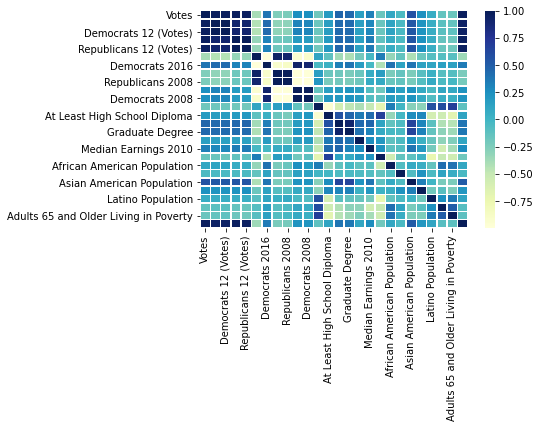

In [101]:
# Look at correlation plot to determine which features are colinear and which ones are highly correlated
# with our output variable 

# need to pick one:
# output variable = Democrats 2016
# output variable = Republicans 2016
#sn.heatmap(df.corr(), annot=True)
#plt.show()        
df_sub = df.iloc[:,4:30]
sn.heatmap(df_sub.corr(),cmap="YlGnBu",linewidth = 0.5)




In [102]:
features = ['Democrats 2016','High School Diploma','White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Sexually.transmitted.infections','Average Unemployment % 2016','Poverty Percent, All Ages']

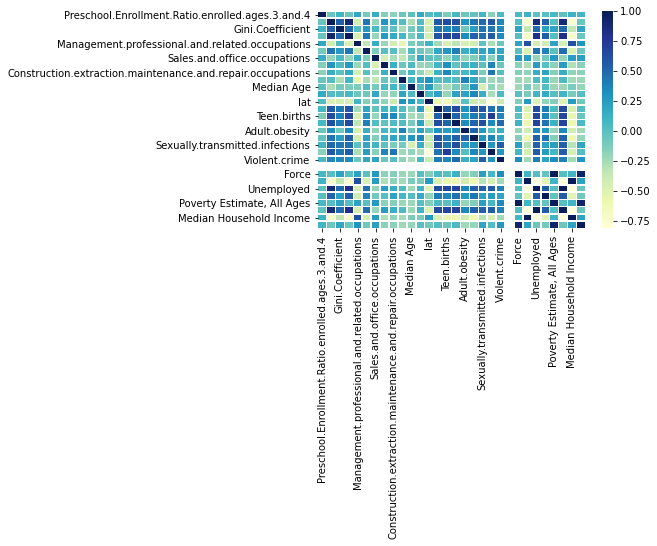

In [103]:
df_sub_2 = df.iloc[:,30:]
sn.heatmap(df_sub_2.corr(),cmap="YlGnBu",linewidth = 0.5)

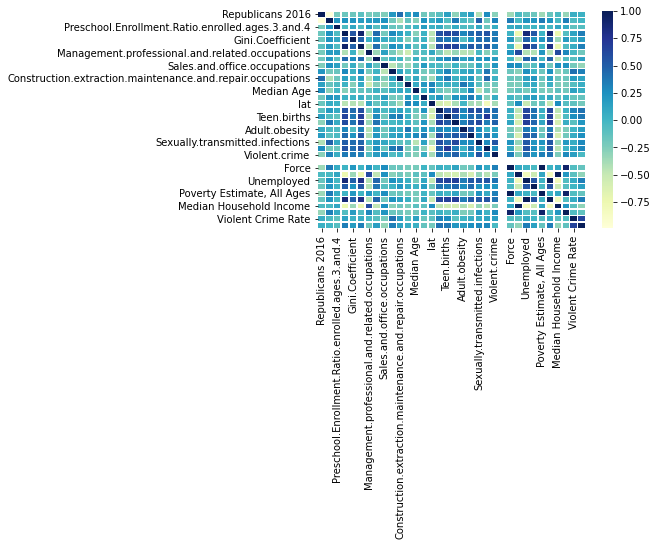

In [113]:

lst = [9,10]
lst2 = list(range(30,61))
lst3 = lst+lst2
lst3
Lst3 = [9,10] + list(range(30,61))
len(list(df.columns))
df.dtypes

df_sub_3 = df.iloc[:,Lst3]
sn.heatmap(df_sub_3.corr(),cmap="YlGnBu",linewidth = 0.5)

In [99]:
types = (df.dtypes)
types.tail(30)


Poverty.Rate.below.federal.poverty.threshold                  float64
Gini.Coefficient                                              float64
Child.Poverty.living.in.families.below.the.poverty.line       float64
Management.professional.and.related.occupations               float64
Service.occupations                                           float64
Sales.and.office.occupations                                  float64
Farming.fishing.and.forestry.occupations                      float64
Construction.extraction.maintenance.and.repair.occupations    float64
Production.transportation.and.material.moving.occupations     float64
Median Age                                                    float64
lon                                                           float64
lat                                                           float64
Low.birthweight                                               float64
Teen.births                                                   float64
Children.in.single.p

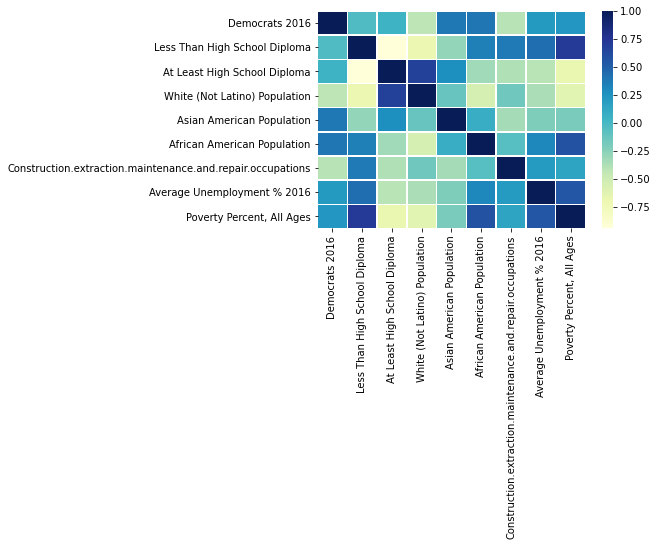

In [132]:
df_features = df[['Democrats 2016','Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages']]
sn.heatmap(df_features.corr(),cmap="YlGnBu",linewidth = 0.5)

In [ ]:
# might want to make some visualizations to look at the relationship between features
# this can indicate to us if we need to use any polynomial transformations


In [ ]:
# Do we need to deal with encoding any of our features? I believe they are all continuous 
# we should be sure to mention this in our report - didn't need to do any binning/encoding

In [137]:
# get a subset of features we likely will use
df_features = df[['Less Than High School Diploma','At Least High School Diploma',
                  'White (Not Latino) Population','Asian American Population',
            'African American Population','Construction.extraction.maintenance.and.repair.occupations',
           'Average Unemployment % 2016','Poverty Percent, All Ages']]

In [139]:
# create our train validate test split
# What proportion should we use? use cross validation?
# be sure to shuffle our data to get counties from each state in each set
train_test_split 
x_train, x_test, y_train, y_test = train_test_split(df_features, df['Democrats 2016'], test_size=0.2,shuffle=True)




918     43.140223
1062    35.231714
894      8.782743
989     27.897458
496     31.897847
          ...    
1003    65.733520
720     19.642027
707     21.087680
694     24.369450
471     35.234752
Name: Democrats 2016, Length: 213, dtype: float64


In [52]:
# Begin running models with different subsets of features and feature combinations (polynomial terms??)
# to determine which ones result in best validation error




In [ ]:
# examine training and validation error to pick a model


In [ ]:
# any outliers skewing our validation error?

In [55]:
# define next steps for the final report portion of the project